<h1><center> Optimisation des Primes d'Assurance : Sélection des Meilleurs Modèles pour la Prédiction de la Fréquence et du Coût des Sinistres </center></h1>

Après avoir développé quatre modèles distincts pour prédire la fréquence des sinistres corporels et matériels, ainsi que le coût des sinistres matériels et corporels, nous avons exploré un éventail de méthodes issues du machine learning et du deep learning. Dans le cadre de ce code, nous avons procédé à la sélection des meilleurs modèles basée sur leur performance supérieure. L'objectif final est de calculer les primes corporelles et matérielles en utilisant le produit du coût par la fréquence des sinistres, ce qui nous permet de déterminer avec précision le montant des primes à appliquer

# Table des matières :

* [1 - Initialisation de l'étude](#initialisation)
* [2 - Retraitements des données](#retraitements)
* [3 - Modèles de Machine Learning](#Modèles)
* [ 4- Prime](#Modèles)



### 1. Chargement du jeu de données

In [77]:
# Librairies :
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, MaxAbsScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, r2_score, mean_squared_error, mean_absolute_error
import scipy.stats
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.svm import SVR
from xgboost import XGBRegressor
from category_encoders import CountEncoder, TargetEncoder
import shap
from sklearn.neural_network import MLPRegressor

In [86]:
model_couts_corporels = joblib.load('model_couts corporels.joblib')

In [79]:
model_couts_materiels = joblib.load('model_couts materiels.joblib')

In [80]:
model_frequence_corporel = joblib.load('model_frequence_corporel.joblib')

In [81]:
model_frequence_materiel = joblib.load('model_frequence_materiel.joblib')

In [82]:
# Load the dataset :
df = pd.read_csv("training_clean.csv")
df.head()

,PolNum,CalYear,Gender,Type,Category,Occupation,Age,Group1,Bonus,Poldur,Value,Adind,SubGroup2,Group2,Density,Exppdays,Numtppd,Numtpbi,Indtppd,Indtpbi
0,200114978,2009,Male,C,Large,Employed,25,18,85,3,15080.0,0,L46,L,72.012883,365.0,1,0,0.0,0.0
1,200114994,2009,Male,E,Large,Employed,20,11,30,2,22370.0,1,O38,O,39.550411,365.0,1,0,0.0,0.0
2,200115001,2009,Female,E,Large,Unemployed,42,11,85,0,39650.0,0,Q28,Q,169.529148,365.0,2,0,0.0,0.0
3,200115011,2009,Female,C,Medium,Housewife,21,5,0,0,12600.0,1,L6,L,58.894688,365.0,1,0,0.0,0.0
4,200115015,2009,Female,D,Large,Employed,33,12,30,10,9065.0,0,N4,N,109.631885,365.0,2,0,0.0,0.0


In [83]:
df.describe()

,PolNum,CalYear,Age,Group1,Bonus,Poldur,Value,Adind,Density,Exppdays,Numtppd,Numtpbi,Indtppd,Indtpbi
count,9.997900e+04,99979.000000,99979.000000,99979.000000,99979.000000,99979.000000,99979.000000,99979.000000,99979.000000,99979.000000,99979.000000,99979.000000,99979.000000,99979.000000
mean,2.002003e+08,2009.499935,41.124126,10.691725,-9.374319,5.470579,16358.767416,0.512178,117.142810,349.821137,0.147391,0.046780,106.110750,222.793486
std,6.217119e+04,0.500002,14.301168,4.687371,42.481030,4.591067,10253.792535,0.499854,79.493407,26.019809,0.436855,0.219528,444.979787,1859.763345
min,2.001149e+08,2009.000000,18.000000,1.000000,-50.000000,0.000000,1000.000000,0.000000,14.377142,302.500000,0.000000,0.000000,0.000000,0.000000
25%,2.001399e+08,2009.000000,30.000000,7.000000,-40.000000,1.000000,8380.000000,0.000000,50.566406,340.000000,0.000000,0.000000,0.000000,0.000000
50%,2.001649e+08,2009.000000,40.000000,11.000000,-30.000000,4.000000,14605.000000,1.000000,94.364623,365.000000,0.000000,0.000000,0.000000,0.000000
75%,2.002608e+08,2010.000000,51.000000,14.000000,10.000000,9.000000,22565.000000,1.000000,174.644525,365.000000,0.000000,0.000000,0.000000,0.000000
max,2.002858e+08,2010.000000,75.000000,20.000000,85.000000,15.000000,43842.500000,1.000000,297.385170,365.000000,7.000000,3.000000,12878.369910,69068.026292


### 2. Pré-traitement des données

In [84]:
df=df.iloc[21:]

In [85]:
bins = [18, 25, 40, 60, 100]   
labels = ['18-24', '25-39', '40-59', '60+']  # Les labels correspondent aux tranches d'âge

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df['Age_Bonus'] = df['Age'] * df['Bonus']

# Vérifier le résultat
df[['Age', 'AgeGroup']].head()
grouped_counts = df.groupby('AgeGroup')['Numtpbi'].value_counts().unstack(fill_value=0)

print(grouped_counts)

Numtpbi       0     1   2  3
AgeGroup                    
18-24     11924  1209  76  2
25-39     34538  1695  56  2
40-59     36733  1160  27  2
60+       12262   269   3  0


/tmp/ipykernel_69407/1466526461.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_counts = df.groupby('AgeGroup')['Numtpbi'].value_counts().unstack(fill_value=0)


### 3. Implementation des meilleurs modèles de prédiction du nombre de réclamations et des coûts totaux corporels et matériels

#### a. Implementation du modèle d'apprentissage pour prédire le nombre de réclamations pour blessures corporelles de tiers : 

In [87]:
numeric_features = ['Age','Bonus', 'Indtpbi']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['Gender', 'Occupation','Type']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [88]:
# Split the data into features and target variable
X = df[['Gender', 'Occupation', 'Age', 'Bonus', 'Type','Indtpbi']]
y = df['Numtpbi']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
y_pred_rf = model_frequence_corporel.predict(X_test)

#### b. Implementation du modèle d'apprentissage pour prédire le nombre de réclamations matérielles de tiers : 

In [90]:
numeric_features = ['Age','Bonus', 'Indtppd']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['Gender', 'Occupation','Type']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [91]:
# Split the data into features and target variable
X_fm = df[['Gender', 'Occupation', 'Age','Bonus', 'Type','Indtppd']]
y_fm = df['Numtppd']

# Split the data into training and testing sets
X_train_rfm, X_test_rfm, y_train_rfm, y_test_rfm = train_test_split(X_fm, y_fm, test_size=0.2, random_state=42)

In [92]:
y_pred_rfm = model_frequence_materiel.predict(X_test_rfm)

#### c. Implementation du modèle d'apprentissage pour prédire le coût total des réclamations pour blessures corporelles de tiers:

In [93]:
# List of column names to select
columns_to_select_Ind = ['Gender', 'Type', 'Category', 'Occupation', 'PolNum', 'CalYear', 'Age', 'Adind', 'Density', 'Bonus', 'Exppdays', 
                         'Numtpbi','Indtppd', 'Numtppd']

# Select the columns and assign them to X
X_Ind = df[columns_to_select_Ind] # features
y_Ind = df["Indtpbi"] # target variable

In [94]:
# Applying a pipeline on categorical and numerical feature
categorical_features = X_Ind.select_dtypes(include=['object', 'bool']).columns
numerical_features = X_Ind.select_dtypes(exclude=['object', 'bool']).columns

In [96]:
# Handling missing data and normalization of numeric data with MAX Abs Scaler
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),  # Replace missing numeric data by the median
    ("scaler", StandardScaler())])  # Normalization of numeric data after imputing for the missing values

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Not defined')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])  # Handling missing categorical data

In [95]:
# Define the features preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [97]:
# As our target variable can be imbalanced
X_train_Ind, X_test_Ind, y_train_Ind, y_test_Ind = train_test_split(X_Ind, y_Ind, test_size=0.2, random_state=42)

In [98]:
y_pred_rf_grid_Ind = model_couts_corporels.predict(X_test_Ind)

#### d. Implementation du modèle d'apprentissage pour prédire le coût total des réclamations matérielles de tiers

In [99]:
# List of column names to select
columns_to_select_Ind = ['Type', 'Category', 'PolNum', 'CalYear', 'Age', 'Adind', 'Density', 'Bonus', 'Exppdays', 'Group1',
                     'Numtpbi', 'Indtpbi', 'Numtppd']


# Select the columns and assign them to X
X_Ind_ppd = df[columns_to_select_Ind] # features
y_Ind_ppd = df["Indtppd"] # target variable

In [100]:
# Applying a pipeline on categorical and numerical feature
categorical_features = X_Ind_ppd.select_dtypes(include=['object', 'bool']).columns
numerical_features = X_Ind_ppd.select_dtypes(exclude=['object', 'bool']).columns

In [101]:
# Handling missing data and normalization of numeric data with MAX Abs Scaler
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),  # Replace missing numeric data by the median
    ("scaler", StandardScaler())])  # Normalization of numeric data after imputing for the missing values

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Not defined')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])  # Handling missing categorical data

In [102]:
# Define the features preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [103]:
# As our target variable can be imbalanced
X_train_Ind_ppd, X_test_Ind_ppd, y_train_Ind_ppd, y_test_Ind_ppd = train_test_split(X_Ind_ppd, y_Ind_ppd, test_size=0.2, random_state=42)

In [105]:
# Make predictions
y_pred_rf_grid_Ind_ppd = model_couts_materiels.predict(X_test_Ind_ppd)

### 4. Calcul des primes annuelles destinées à couvrir les dommages matériels et corporels 

#### a. Calcul de la prime annuelle destinée à couvrir les dommages corporels 

In [31]:
# Bodily premium insurance
Prime_Predite= y_pred_rf * y_pred_rf_grid_Ind
prime_reelle = y_test * y_test_Ind

# Creation of a data frame to compare
comparaison_primes = pd.DataFrame({
    'Prime_Reelle': prime_reelle,
    'Prime_Predite': Prime_Predite
})

# Displaying the DataFrame
comparaison_primes.head(50)

,Prime_Reelle,Prime_Predite
38916,0.000000,0.000000
599,0.000000,0.000000
83171,0.000000,0.000000
27500,0.000000,0.000000
48832,0.000000,0.000000
11334,0.000000,0.000000
28467,0.000000,0.000000
68267,0.000000,0.000000
83717,0.000000,0.000000
16282,0.000000,0.000000


In [32]:
# Computing the metrics to evaluate our results 
# Calculate and print MAE (Mean Absolute Error)
mae = mean_absolute_error(prime_reelle, Prime_Predite)

# Calculate and print MSE (Mean Squared Error)
mse = mean_squared_error(prime_reelle, Prime_Predite)

# Calculate and print RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

# Calculate and print R2 SCORE
r2 = r2_score(prime_reelle, Prime_Predite)

# Calculate and print MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((prime_reelle - Prime_Predite) / prime_reelle)) * 100

# Create a dictionary to store the results
results = {
    'Metric': ['MAE', 'MSE', 'RMSE', 'R2 SCORE', 'MAPE'],
    'Value': [mae, mse, rmse, r2, mape]
}

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

# Print the DataFrame
print("Performance Metrics:")
(results_df)

Performance Metrics:


,Metric,Value
0,MAE,2.185847e+02
1,MSE,2.427455e+06
2,RMSE,1.558029e+03
3,R2 SCORE,4.060904e-01
4,MAPE,4.039303e+04


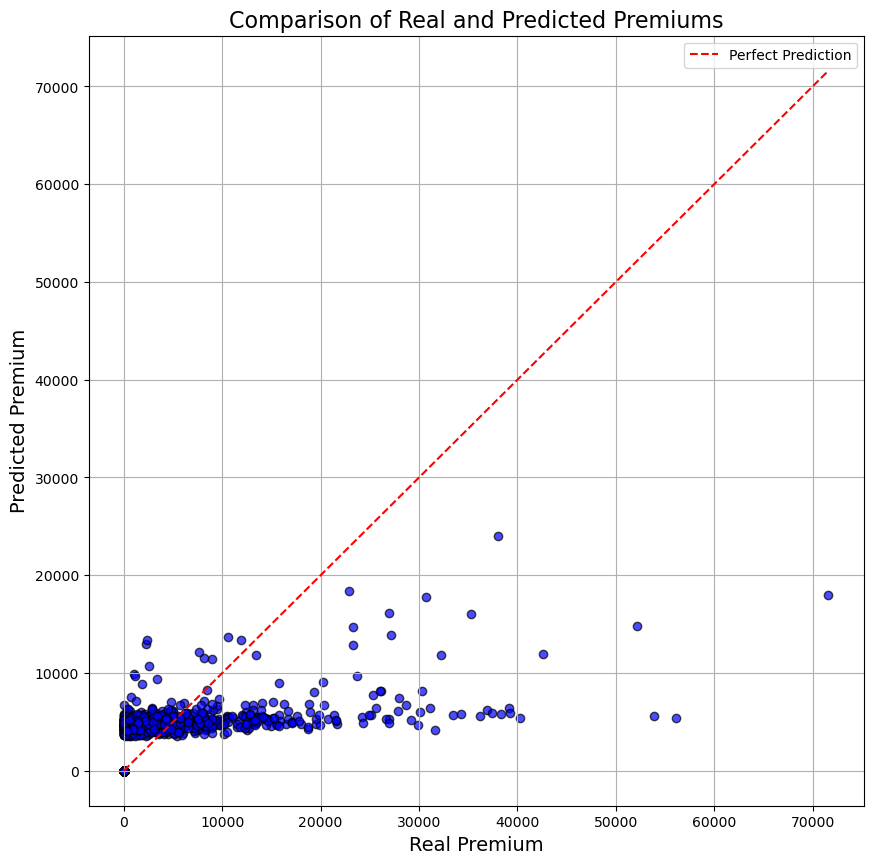

In [33]:
plt.figure(figsize=(10, 10))

# Plotting real premiums against predicted premiums
plt.scatter(comparaison_primes['Prime_Reelle'], comparaison_primes['Prime_Predite'], alpha=0.7, edgecolor='k', color='blue')

# Plotting y = x line for reference
max_prime = max(comparaison_primes['Prime_Reelle'].max(), comparaison_primes['Prime_Predite'].max())
plt.plot([0, max_prime], [0, max_prime], 'r--', label='Perfect Prediction')

# Adding legends and titles
plt.xlabel('Real Premium', fontsize=14)
plt.ylabel('Predicted Premium', fontsize=14)
plt.title('Comparison of Real and Predicted Premiums', fontsize=16)
plt.legend()
plt.grid(True)

# Displaying the plot
plt.show()


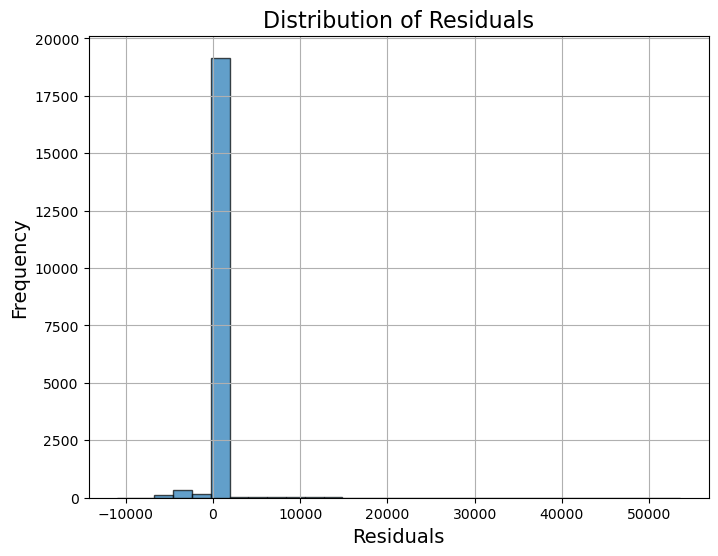

In [34]:
# We will plot a graph of residuals to visualize the distribution of prediction errors and whether there are patterns in the residuals.
# Calculate residuals
residuals = prime_reelle - Prime_Predite

# Plot a histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Residuals', fontsize=16)
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

In [39]:
# Identify outliers
outliers = comparaison_primes[np.abs(residuals) > 3 * np.std(residuals)]

# Display outliers
print("Outliers:")
(outliers)

Outliers:


,Prime_Reelle,Prime_Predite
65454,12.381074,4982.559784
9515,10042.312894,4943.716982
57236,16.752914,5220.034262
2535,26158.987550,8145.501894
94332,239.540053,5277.396847
...,...,...
56782,14174.021489,5448.665352
93252,489.198534,5172.682358
88144,24936.819357,5669.726041
50494,19830.467615,5654.009662


En examinant l'histogramme, on note qu'il y a une structure discernable dans les résidus (pic autour des valeurs entre 0 et 5000).Cela peut indiquer que le modèle sous-estime systématiquement certaines valeurs.

In [35]:
# Pearson correlation coefficient
correlation = np.corrcoef(prime_reelle, Prime_Predite)[0, 1]

# Mean difference between actual and predicted values
mean_difference = np.mean(prime_reelle - Prime_Predite)

print("Pearson Correlation Coefficient:", correlation)
print("Mean Difference between Actual and Predicted Values:", mean_difference)


Pearson Correlation Coefficient: 0.6422761372251238
Mean Difference between Actual and Predicted Values: 2.7585502515988964


Le coefficient de Pearson, étant proche de 1, indique une forte corrélation positive, ce qui signifie que les primes réelles et prédites augmentent ensemble. 
Pour la différence moyenne entre les valeurs réelles et prédites, étant une différence positive, cela indiquerait une tendance à sous-estimer les valeurs réelles.

#### b. Calcul de la prime annuelle destinée à couvrir les dommages matériels

In [45]:
# Material remium insurance 
prime_predi_mat = y_pred_rfm * y_pred_rf_grid_Ind_ppd
prime_mat = y_test_rfm * y_test_Ind_ppd

# Creation of a data frame to compare
comparaison_primes_material = pd.DataFrame({
    'Prime_Reelle_mat': prime_mat,
    'Prime_Predite_mat': prime_predi_mat
})

# Displaying the DataFrame
comparaison_primes_maetrial.head(50)

,Prime_Reelle_mat,Prime_Predite_mat
38916,0.000000,0.000000
599,583.350978,773.366343
83171,0.000000,0.000000
27500,0.000000,0.000000
48832,0.000000,0.000000
11334,0.000000,0.000000
28467,0.000000,0.000000
68267,0.000000,0.000000
83717,0.000000,0.000000
16282,0.000000,0.000000


In [41]:
# Computing the metrics to evaluate our results 
# Compute MAE (Mean Absolute Error)
mae = mean_absolute_error(prime_mat, prime_predi_mat)

# Compute MSE (Mean Squared Error)
mse = mean_squared_error(prime_mat, prime_predi_mat)

# Compute RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

# Compute R2 SCORE
r2 = r2_score(prime_mat, prime_predi_mat)

# Compute MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((prime_mat - prime_predi_mat) / prime_mat)) * 100

# Create a dictionary to store the results
results = {
    'Metric': ['MAE', 'MSE', 'RMSE', 'R2 SCORE', 'MAPE'],
    'Value': [mae, mse, rmse, r2, mape]
}

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

# Print the DataFrame
print("Performance Metrics:")
(results_df)

Performance Metrics:


,Metric,Value
0,MAE,92.455164
1,MSE,335863.632495
2,RMSE,579.537430
3,R2 SCORE,0.672644
4,MAPE,505.486519


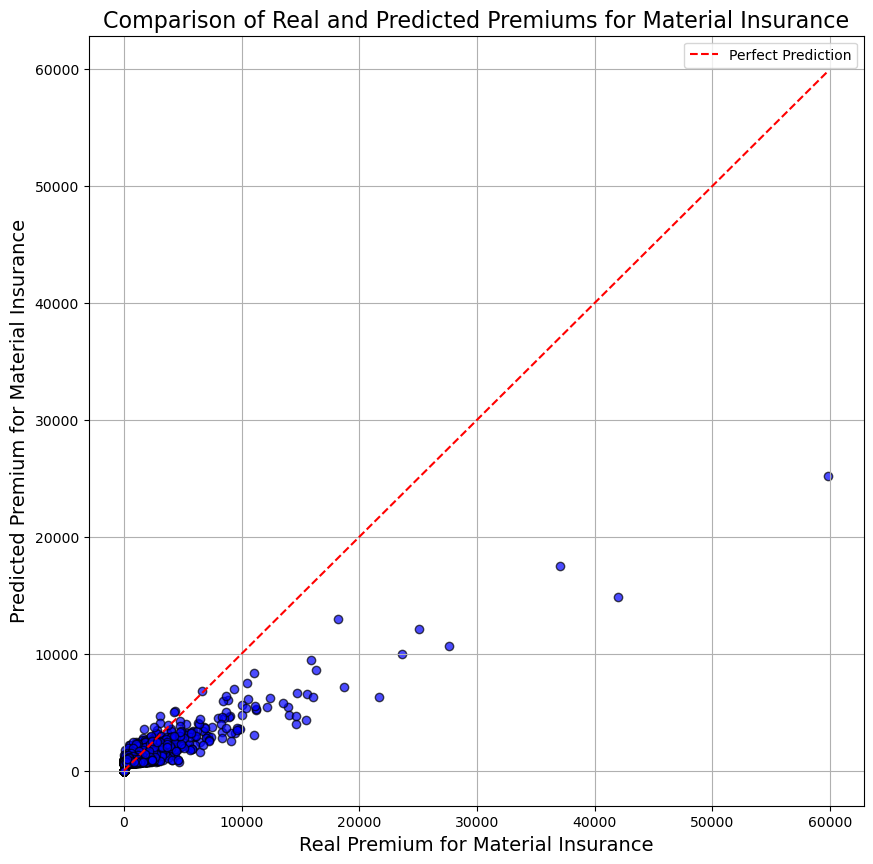

In [42]:
plt.figure(figsize=(10, 10))

# Plotting real premiums against predicted premiums
plt.scatter(comparaison_primes_maetrial['Prime_Reelle_mat'], comparaison_primes_maetrial['Prime_Predite_mat'], alpha=0.7, edgecolor='k', color='blue')

# Plotting y = x line for reference
max_prime_mat = max(comparaison_primes_maetrial['Prime_Reelle_mat'].max(), comparaison_primes_maetrial['Prime_Predite_mat'].max())
plt.plot([0, max_prime_mat], [0, max_prime_mat], 'r--', label='Perfect Prediction')

# Adding legends and titles
plt.xlabel('Real Premium for Material Insurance', fontsize=14)
plt.ylabel('Predicted Premium for Material Insurance', fontsize=14)
plt.title('Comparison of Real and Predicted Premiums for Material Insurance', fontsize=16)
plt.legend()
plt.grid(True)

# Displaying the plot
plt.show()


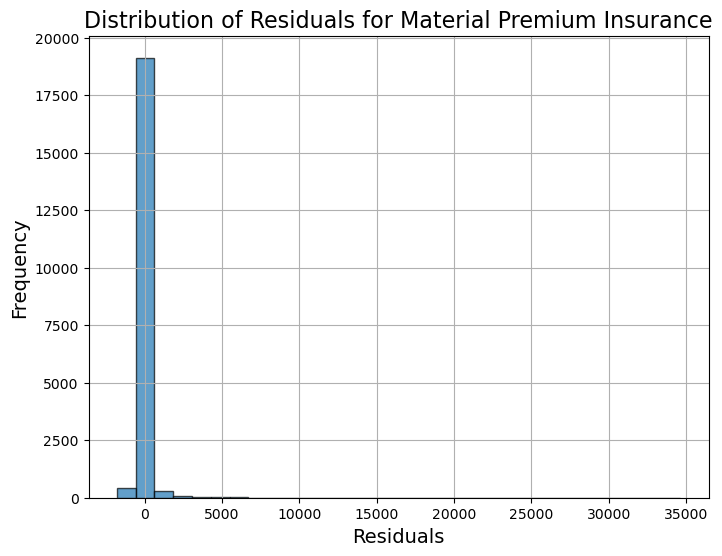

In [43]:
# Calculate residuals
residuals_material = prime_mat - prime_predi_mat

# Plot a histogram of residuals for material premium insurance
plt.figure(figsize=(8, 6))
plt.hist(residuals_material, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Residuals for Material Premium Insurance', fontsize=16)
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

In [46]:
# Identify outliers
outliers = comparaison_primes_material[np.abs(residuals_material) > 3 * np.std(residuals_material)]

# Display outliers
print("Outliers:")
(outliers)

Outliers:


,Prime_Reelle_mat,Prime_Predite_mat
52345,4581.192957,875.946337
48052,9015.002119,4639.290130
73505,4089.632028,896.725359
20181,16285.980351,8640.424857
26596,4101.764863,2261.245839
...,...,...
16362,14707.360960,6639.693136
29937,6503.393515,4449.119406
98136,6086.046061,2966.305540
94859,5677.430552,3244.192285


En examinant l'histogramme, on note qu'il y a une structure discernable dans les résidus (pic autour des valeurs nulles).Cela peut indiquer que le modèle sous-estime systématiquement certaines valeurs.

In [47]:
# Pearson correlation coefficient
correlation = np.corrcoef(prime_mat, prime_predi_mat)[0, 1]

# Mean difference between actual and predicted values
mean_difference = np.mean(prime_mat - prime_predi_mat)

print("Pearson Correlation Coefficient:", correlation)
print("Mean Difference between Actual and Predicted Values:", mean_difference)

Pearson Correlation Coefficient: 0.8970116403965654
Mean Difference between Actual and Predicted Values: 18.512588797245037


Le coefficient de Pearson, étant proche de 1, indique une forte corrélation positive, ce qui signifie que les primes réelles et prédites augmentent ensemble. 
Pour la différence moyenne entre les valeurs réelles et prédites, étant une différence positive, cela indiquerait une tendance à sous-estimer les valeurs réelles.